# AutoMPG
## Krittin Chatrinan 6088022 & Sunat Praphanwong 6088130

In [1]:
import wget
mpgfile = 'https://raw.githubusercontent.com/plotly/datasets/master/auto-mpg.csv'
loadfile = wget.download(mpgfile)

100% [..............................................................................] 10118 / 10118

In [2]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [3]:
df.isna().sum(axis=0)

mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
model-year      0
dtype: int64

In [4]:
df.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [5]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
count,398.000000,398.000000,398.000000,396.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.189394,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.402030,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
df['horsepower'].mode()

0    150.0
dtype: float64

In [7]:
common_value = 150
data = [df]

for dataset in data:
    dataset['horsepower'] = dataset['horsepower'].fillna(common_value)

In [8]:
df.isna().sum(axis=0)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model-year      0
dtype: int64

In [9]:
#Set the values in range 0 to 1
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [10]:
df_scale = df.copy()

df_scale['displacement'] = scale(df_scale['displacement'])
df_scale['horsepower'] = scale(df_scale['horsepower'])
df_scale['acceleration'] = scale(df_scale['acceleration'])
df_scale['weight'] = scale(df_scale['weight'])
df_scale['mpg'] = scale(df_scale['mpg'])

In [11]:
df_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,0.239362,8,0.617571,0.456522,0.536150,0.238095,70
1,0.159574,8,0.728682,0.646739,0.589736,0.208333,70
2,0.239362,8,0.645995,0.565217,0.516870,0.178571,70
3,0.186170,8,0.609819,0.565217,0.516019,0.238095,70
4,0.212766,8,0.604651,0.510870,0.520556,0.148810,70


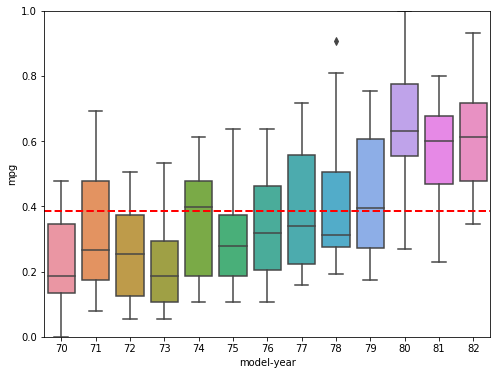

In [12]:
var = 'model-year'
data_plt = pd.concat([df_scale['mpg'], df_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(df_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

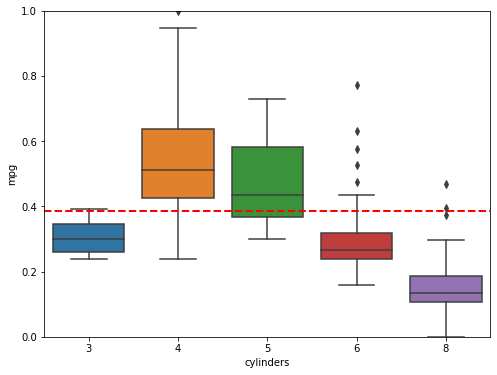

In [13]:
var = 'cylinders'
data_plt = pd.concat([df_scale['mpg'], df_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(df_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In [14]:
df_scale.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
mpg,1.000000,-0.775396,-0.804203,-0.775061,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.838253,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.891078,0.932824,-0.543684,-0.370164
horsepower,-0.775061,0.838253,0.891078,1.000000,0.856342,-0.677920,-0.423764
weight,-0.831741,0.896017,0.932824,0.856342,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.677920,-0.417457,1.000000,0.288137
model-year,0.579267,-0.348746,-0.370164,-0.423764,-0.306564,0.288137,1.000000


In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [16]:
factors = ['cylinders','displacement','horsepower','acceleration','weight','model-year']
X = df_scale[factors].copy()
Y = df_scale['mpg'].copy()

In [17]:
X = StandardScaler().fit_transform(X)

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 555)
X_train.shape[0] == Y_train.shape[0]

True

In [19]:
regressor = LinearRegression()
regressor.get_params()
regressor.fit(X_train,Y_train)
Y_predicted = regressor.predict(X_train)
rmse = mean_squared_error(y_true = Y_train, y_pred = Y_predicted)
rmse

0.008450986287232025